In [1]:
import os, subprocess
import json
import uproot3
import awkward as ak
import numpy as np
from coffea import processor, util, hist
import pickle
import pandas as pd

from plotter import *

import warnings
warnings.filterwarnings('ignore')

In [2]:
with open('lumi.json') as f:
    lumis = json.load(f)

with open('xsec.json') as f:
  xs = json.load(f)

with open('pmap.json') as f:
  pmap = json.load(f)

In [3]:
year = '2016'
ddbthr = 0.64

In [4]:
# Read the histogram from the pickle file
smalljetkin = pickle.load(open(year+'/smalljetkin.pkl','rb')).integrate('region','muoncontrol')
smalljetkin

<Hist (process,deta,dphi,mjj,ddb1) instance at 0x7f97b84ca910>

0.0


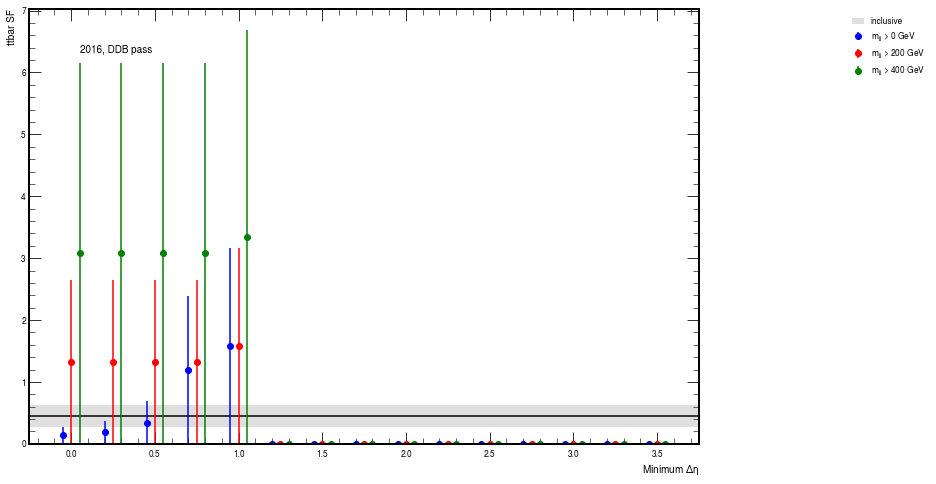

In [5]:
detabins = [0.25*i for i in range(0,16)]
mjjbins = [0,200,400,1000]

colors = ['blue','red','green']
shift = [-0.05,0,0.05]

hpass_0 = smalljetkin.integrate('mjj',overflow='allnan').integrate('deta',overflow='allnan').integrate('dphi',overflow='allnan').integrate('ddb1',int_range=slice(ddbthr,1))
hfail_0 = smalljetkin.integrate('mjj',overflow='allnan').integrate('deta',overflow='allnan').integrate('dphi',overflow='allnan').integrate('ddb1',int_range=slice(0,ddbthr))

ttbarpass_0 = hpass_0.integrate('process','ttbar').values()[()]
datapass_0 = hpass_0.integrate('process','muondata').values()[()]

sfpass_0 = datapass_0/ttbarpass_0
uncpass_0 = np.sqrt(datapass_0)/ttbarpass_0

fig = plt.figure(figsize=(12,8))

plt.plot([-1,7],[sfpass_0,sfpass_0],color='black')
plt.bar(x=[-1,7], height=[2*uncpass_0,2*uncpass_0], bottom=[sfpass_0-uncpass_0,sfpass_0-uncpass_0], width=10, align='edge', linewidth=0, color='gray', alpha=0.25, zorder=-1, label='inclusive')


hpass = smalljetkin.sum('dphi').integrate('ddb1',int_range=slice(ddbthr,1))
hfail = smalljetkin.sum('dphi').integrate('ddb1',int_range=slice(0,ddbthr))     
    
for i,y in enumerate(mjjbins[:-1]):
    
    sfpass = []
    uncpass = []
    
    xbins = [x+shift[i] for x in detabins]
    
    for x in detabins[:-1]:
        ttbarpass = hpass.integrate('mjj',int_range=slice(y,10000)).integrate('deta',int_range=slice(x,7)).integrate('process','ttbar').values()[()]
        datapass = hpass.integrate('mjj',int_range=slice(y,10000)).integrate('deta',int_range=slice(x,7)).integrate('process','muondata').values()[()]
            
        sfpass += [datapass/ttbarpass]
            
        uncpass += [np.sqrt(datapass)/ttbarpass]
            
    plt.errorbar(xbins[:-1],sfpass,yerr=uncpass,color=colors[i],label='$m_{jj}$ > '+str(y)+' GeV',marker='o',linestyle='')
   
plt.xlim(detabins[0]-0.25,detabins[-1])
plt.ylim(0,plt.ylim()[1])
plt.ylabel('ttbar SF')
plt.xlabel('Minimum $\Delta\eta$')
plt.legend(bbox_to_anchor=(1.35, 1))

plt.text(.05, plt.ylim()[1]*0.9, year+', DDB pass')

print(sfpass[-1]/sfpass_0)

name = year+'/ttbarsf_pass'
png_name = name+'.png'
plt.savefig(png_name,bbox_inches='tight')

pdf_name = name+'.pdf'
plt.savefig(pdf_name,bbox_inches='tight')

1.7218335253335957


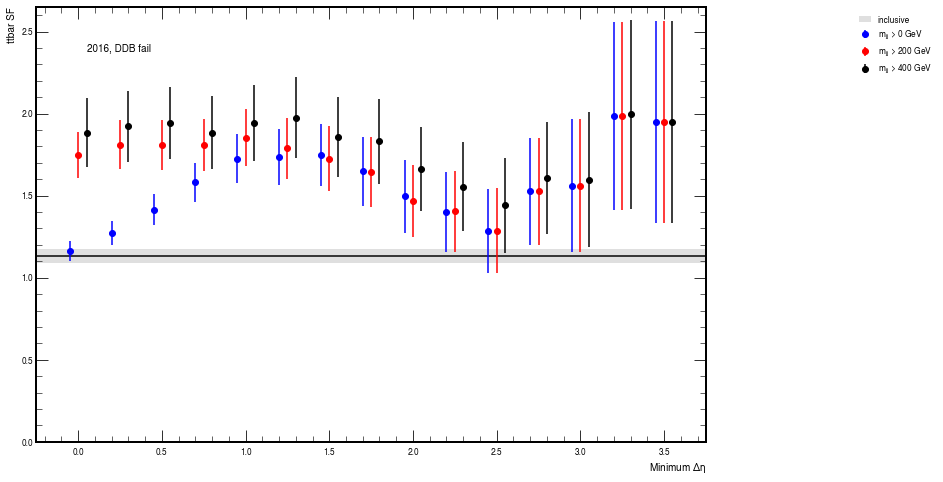

In [6]:
detabins = [0.25*i for i in range(0,16)]
mjjbins = [0,200,400,1000]

colors = ['blue','red','black']
shift = [-0.05,0,0.05]

hpass_0 = smalljetkin.integrate('mjj',overflow='allnan').integrate('deta',overflow='allnan').integrate('dphi',overflow='allnan').integrate('ddb1',int_range=slice(ddbthr,1))
hfail_0 = smalljetkin.integrate('mjj',overflow='allnan').integrate('deta',overflow='allnan').integrate('dphi',overflow='allnan').integrate('ddb1',int_range=slice(0,ddbthr))

ttbarfail_0 = hfail_0.integrate('process','ttbar').values()[()]
datafail_0 = hfail_0.integrate('process','muondata').values()[()]

sffail_0 = datafail_0/ttbarfail_0
uncfail_0 = np.sqrt(datafail_0)/ttbarfail_0

fig = plt.figure(figsize=(12,8))

plt.plot([-1,7],[sffail_0,sffail_0],color='black')
plt.bar(x=[-1,7], height=[2*uncfail_0,2*uncfail_0], bottom=[sffail_0-uncfail_0,sffail_0-uncfail_0], width=10, align='edge', linewidth=0, color='gray', alpha=0.25, zorder=-1, label='inclusive')

hpass = smalljetkin.sum('dphi').integrate('ddb1',int_range=slice(ddbthr,1))
hfail = smalljetkin.sum('dphi').integrate('ddb1',int_range=slice(0,ddbthr))

for i,y in enumerate(mjjbins[:-1]):
    
    sffail = []
    uncfail = []
    
    xbins = [x+shift[i] for x in detabins]
    
    for x in detabins[:-1]:
        ttbarfail = hfail.integrate('mjj',int_range=slice(y,10000)).integrate('deta',int_range=slice(x,7)).integrate('process','ttbar').values()[()]
        datafail = hfail.integrate('mjj',int_range=slice(y,10000)).integrate('deta',int_range=slice(x,7)).integrate('process','muondata').values()[()]
    
        sffail += [datafail/ttbarfail]
        uncfail += [np.sqrt(datafail)/ttbarfail]
        
    plt.errorbar(xbins[:-1],sffail,yerr=uncfail,color=colors[i],label='$m_{jj}$ > '+str(y)+' GeV',marker='o',linestyle='')
    
plt.xlim(detabins[0]-0.25,detabins[-1])
plt.ylim(0,plt.ylim()[1])
plt.ylabel('ttbar SF')
plt.xlabel('Minimum $\Delta\eta$')
plt.legend(bbox_to_anchor=(1.35, 1))

plt.text(.05, plt.ylim()[1]*0.9, year+', DDB fail')

print(sffail[-1]/sffail_0)

name = year+'/ttbarsf_fail'
png_name = name+'.png'
plt.savefig(png_name,bbox_inches='tight')

pdf_name = name+'.pdf'
plt.savefig(pdf_name,bbox_inches='tight')